# Import libraries

In [180]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# Import Functions

In [181]:
%run "dslabs_functions.py" #run notebook with functions made py the professor and that are going to be use in the project

In [201]:

#get file from data pre processing notebook. This file has all the column we need to start the data profiling phase
filepath = r'dataset/df_ecom_profiling.csv'

excel_mapping_filepath=r'dataset/df_ecom_values_encoded.xlsx'

file_tag = 'df_ecom_profiling'

# Load

In [203]:
test_data = False
# test_data = False

# Load the data
if test_data:
    df = pd.read_csv(filepath, na_values="")

    df: DataFrame = df.sample(frac=0.0015, replace = False)

else:
    # If not test_data, load the entire dataset
    df = pd.read_csv(filepath)


# encoded dataframe duplication
df_enc = df.copy()

df_enc.info()

df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69884 entries, 0 to 69883
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   event_type           69884 non-null  object 
 1   category_code_lvl_1  62736 non-null  object 
 2   category_code_lvl_2  62736 non-null  object 
 3   category_code_lvl_3  62736 non-null  object 
 4   brand                60554 non-null  object 
 5   price                69884 non-null  float64
 6   conversion           69884 non-null  object 
 7   week_of_month        69884 non-null  int64  
 8   is_weekend           69884 non-null  object 
 9   day_of_week          69884 non-null  object 
 10  day                  69884 non-null  int64  
 11  hour                 69884 non-null  int64  
 12  min                  69884 non-null  int64  
 13  time_of_day          69884 non-null  object 
dtypes: float64(1), int64(4), object(9)
memory usage: 7.5+ MB


,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,view,apparel,apparel/scarf,apparel/scarf,chicco,14.13,not_purchase,1,weekday,Thursday,2,7,6,morning
1,view,construction,construction/tools,construction/tools/light,samsung,1280.32,not_purchase,3,weekend,Saturday,18,14,31,afternoon
2,view,electronics,electronics/clocks,electronics/clocks,puckator,20.59,not_purchase,2,weekend,Sunday,12,10,4,morning
3,view,sport,sport/bicycle,sport/bicycle,adidas,82.34,not_purchase,2,weekday,Wednesday,8,5,38,night
4,view,kids,kids/skates,kids/skates,wingoffly,144.12,not_purchase,4,weekend,Saturday,25,20,31,night
5,view,construction,construction/tools,construction/tools/generator,kukmara,58.27,not_purchase,3,weekday,Wednesday,15,15,34,afternoon
6,view,construction,construction/tools,construction/tools/light,tp-link,123.27,not_purchase,4,weekend,Sunday,26,3,59,night
7,view,NaN,NaN,NaN,carbon,728.72,not_purchase,4,weekday,Tuesday,28,3,14,night
8,view,construction,construction/tools,construction/tools/light,samsung,106.04,not_purchase,5,weekday,Thursday,30,8,46,morning
9,cart,appliances,appliances/kitchen,appliances/kitchen/toster,torrent,139.98,not_purchase,1,weekday,Friday,3,15,38,afternoon


In [184]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
event_type                 3
category_code_lvl_1       13
category_code_lvl_2       62
category_code_lvl_3      132
brand                   2021
price                  13403
conversion                 2
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                3
dtype: int64


In [46]:
df.shape[0]

69884

## Split data between train and test dataset
- split 70/30 and use the most recent records to the test data

In [7]:

df_sorted = df.sort_values(by='event_time', ascending=True).reset_index(drop=True)
df_sorted.head()

KeyError: 'event_time'

In [67]:
df.shape[0]
df_sorted.shape[0]


69884

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the split point: calculate the index for 70% of the data
split_index = int(len(df_sorted) * 0.7)

# Create the training set with the first 70% of the data
train_df = df_sorted.iloc[:split_index]

# Create the testing set with the last 30% of the data (the most recent data)
test_df = df_sorted.iloc[split_index:]

# Check the dimensions of the training and testing sets
print(f'Train set size: {train_df.shape[0]}')
print(f'Test set size: {test_df.shape[0]}')

# Display the first 20 rows of the training and testing sets
print("Training set:")
print(train_df.head(20))

print("\nTesting set:")
print(test_df.head(20))

Train set size: 48918
Test set size: 20966
Training set:
                  event_time event_type     brand    price  \
0  2020-04-01 00:01:11+00:00       view  imperial   168.55   
1  2020-04-01 00:07:16+00:00       view       NaN   323.30   
2  2020-04-01 00:17:36+00:00       view   karcher   241.94   
3  2020-04-01 00:18:11+00:00       view        hp   990.76   
4  2020-04-01 00:21:48+00:00       view     oladi    19.31   
5  2020-04-01 00:27:05+00:00       view       NaN   766.78   
6  2020-04-01 00:39:10+00:00       view  dauscher  1090.63   
7  2020-04-01 00:40:01+00:00       view     vitek    30.86   
8  2020-04-01 00:45:59+00:00       view     vitek   141.55   
9  2020-04-01 00:48:01+00:00       view       NaN    25.61   
10 2020-04-01 00:48:44+00:00       view    troyka    12.84   
11 2020-04-01 00:51:15+00:00       view   samsung   393.32   
12 2020-04-01 00:58:09+00:00       view   tp-link    76.42   
13 2020-04-01 01:09:53+00:00       view     intel   774.08   
14 2020-04-01

### Train data

In [54]:
train_df.head(20)

,event_time,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,2020-04-01 00:01:11+00:00,view,imperial,168.55,computers,peripherals,printer,not_purchase,1,weekday,Wednesday,1,0,1,night
1,2020-04-01 00:07:16+00:00,view,NaN,323.30,NaN,NaN,NaN,not_purchase,1,weekday,Wednesday,1,0,7,night
2,2020-04-01 00:17:36+00:00,view,karcher,241.94,sport,trainer,NaN,not_purchase,1,weekday,Wednesday,1,0,17,night
3,2020-04-01 00:18:11+00:00,view,hp,990.76,electronics,audio,headphone,not_purchase,1,weekday,Wednesday,1,0,18,night
4,2020-04-01 00:21:48+00:00,view,oladi,19.31,apparel,shoes,NaN,not_purchase,1,weekday,Wednesday,1,0,21,night
5,2020-04-01 00:27:05+00:00,view,NaN,766.78,apparel,shoes,moccasins,not_purchase,1,weekday,Wednesday,1,0,27,night
6,2020-04-01 00:39:10+00:00,view,dauscher,1090.63,appliances,kitchen,refrigerators,not_purchase,1,weekday,Wednesday,1,0,39,night
7,2020-04-01 00:40:01+00:00,view,vitek,30.86,NaN,NaN,NaN,not_purchase,1,weekday,Wednesday,1,0,40,night
8,2020-04-01 00:45:59+00:00,view,vitek,141.55,appliances,environment,vacuum,not_purchase,1,weekday,Wednesday,1,0,45,night
9,2020-04-01 00:48:01+00:00,view,NaN,25.61,furniture,universal,light,not_purchase,1,weekday,Wednesday,1,0,48,night


### Test data

In [55]:
test_df.head(20)

,event_time,event_type,brand,price,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
48918,2020-04-23 13:22:48+00:00,view,erlit,357.57,NaN,NaN,NaN,not_purchase,4,weekday,Thursday,23,13,22,afternoon
48919,2020-04-23 13:23:27+00:00,view,axis,244.54,appliances,kitchen,toster,not_purchase,4,weekday,Thursday,23,13,23,afternoon
48920,2020-04-23 13:23:48+00:00,cart,philips,56.60,appliances,personal,hair_cutter,not_purchase,4,weekday,Thursday,23,13,23,afternoon
48921,2020-04-23 13:24:48+00:00,view,mattel,32.66,appliances,kitchen,grill,not_purchase,4,weekday,Thursday,23,13,24,afternoon
48922,2020-04-23 13:25:59+00:00,view,sencor,168.83,appliances,kitchen,mixer,not_purchase,4,weekday,Thursday,23,13,25,afternoon
48923,2020-04-23 13:26:08+00:00,view,xiaomi,317.90,construction,tools,light,not_purchase,4,weekday,Thursday,23,13,26,afternoon
48924,2020-04-23 13:26:20+00:00,view,hotpoint-ariston,344.90,appliances,kitchen,hob,not_purchase,4,weekday,Thursday,23,13,26,afternoon
48925,2020-04-23 13:26:35+00:00,view,lg,81.83,furniture,bedroom,blanket,not_purchase,4,weekday,Thursday,23,13,26,afternoon
48926,2020-04-23 13:27:35+00:00,view,adidas,63.30,apparel,shoes,keds,not_purchase,4,weekday,Thursday,23,13,27,afternoon
48927,2020-04-23 13:29:48+00:00,view,samsung,1016.99,construction,tools,light,not_purchase,4,weekday,Thursday,23,13,29,afternoon


In [57]:
from numpy import ndarray
from pandas import DataFrame, read_csv
from matplotlib.pyplot import savefig, show, figure
from dslabs_functions import plot_multibar_chart, CLASS_EVAL_METRICS, run_NB, run_KNN


def evaluate_approach(
    train: DataFrame, test: DataFrame, target: str = "class", metric: str = "accuracy"
) -> dict[str, list]:
    trnY = train.pop(target).values
    trnX: ndarray = train.values
    tstY = test.pop(target).values
    tstX: ndarray = test.values
    eval: dict[str, list] = {}

    eval_NB: dict[str, float] = run_NB(trnX, trnY, tstX, tstY, metric=metric)
    eval_KNN: dict[str, float] = run_KNN(trnX, trnY, tstX, tstY, metric=metric)
    if eval_NB != {} and eval_KNN != {}:
        for met in CLASS_EVAL_METRICS:
            eval[met] = [eval_NB[met], eval_KNN[met]]
    return eval


target = "conversion"
file_tag = "conversion"
train: DataFrame = train_df
test: DataFrame = test_df

figure()
eval: dict[str, list] = evaluate_approach(train, test, target=target, metric="recall")
plot_multibar_chart(
    ["NB", "KNN"], eval, title=f"{file_tag} evaluation", percentage=True
)
savefig(f"images/{file_tag}_eval.png")
show()

ValueError: Unknown label type: (array([0.00000e+00, 4.60000e-01, 4.70000e-01, ..., 2.57399e+03,
       2.57404e+03, 2.57407e+03]),)

<Figure size 640x480 with 0 Axes>

## Data Preparation
- Goal is to improve the quality of the data

#### List of distinct values for each variable

In [204]:
for v in vars["symbolic"]:
    print(v, df[v].unique())

event_type ['view' 'cart' 'purchase']
category_code_lvl_1 ['apparel' 'construction' 'electronics' 'sport' 'kids' nan 'appliances'
 'auto' 'computers' 'furniture' 'accessories' 'medicine' 'country_yard'
 'stationery']
category_code_lvl_2 ['apparel/scarf' 'construction/tools' 'electronics/clocks' 'sport/bicycle'
 'kids/skates' nan 'appliances/kitchen' 'appliances/sewing_machine'
 'appliances/personal' 'auto/accessories' 'appliances/environment'
 'computers/peripherals' 'apparel/shoes' 'electronics/audio'
 'apparel/tshirt' 'construction/components' 'sport/trainer'
 'furniture/bedroom' 'sport/snowboard' 'furniture/bathroom' 'kids/toys'
 'apparel/shirt' 'apparel/underwear' 'accessories/bag' 'computers/desktop'
 'electronics/camera' 'sport/tennis' 'apparel/shorts'
 'electronics/smartphone' 'computers/components' 'kids/swing'
 'medicine/tools' 'sport/diving' 'furniture/living_room' 'apparel/jeans'
 'furniture/kitchen' 'apparel/trousers' 'electronics/video'
 'country_yard/cultivator' 'sport/sk

In [205]:
# Verificar se 'event_time' está presente e é do tipo datetime
if 'event_time' in df.columns and pd.api.types.is_datetime64_any_dtype(df['event_time']):
    # Conta o número de dias únicos
    num_unique_days = df['event_time'].nunique()
    print(f"Número de dias únicos: {num_unique_days}")
else:
    print("A coluna 'event_time' não existe ou não é do tipo datetime.")

# Contar valores distintos em todas as colunas
distinct_values = df.nunique()
print("Número de valores distintos por coluna:")
print(distinct_values)

A coluna 'event_time' não existe ou não é do tipo datetime.
Número de valores distintos por coluna:
event_type                 3
category_code_lvl_1       13
category_code_lvl_2       62
category_code_lvl_3      132
brand                   2021
price                  13403
conversion                 2
week_of_month              5
is_weekend                 2
day_of_week                7
day                       30
hour                      24
min                       60
time_of_day                3
dtype: int64


### Encoding
- we need to do the enconding of the symoblic and cyclical vraibles of the dataset
    - Simbolyc
        - event_type
        - brand
        - category_code_lvl_1
        - category_code_lvl_2
        - category_code_lvl_3
    - Cyclical
        - time_of_day
        - day_of_week
        - hour
        - min
    
    - Numeric 
        - week_of_month
        - day

    - Binary
        - is_weekend
        - conversion


{'numeric': ['price', 'week_of_month', 'day', 'hour', 'min'], 'binary': ['conversion', 'is_weekend'], 'date': ['event_time'], 'symbolic': ['event_type', 'brand', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'day_of_week', 'time_of_day']}

#### Ordinal enconding

For these variables, they are cyclical. However, as we only have data for 1 month in our dataset, there are some variables that will not repeat in our dataset. So for this variables will make the hierarchy according to the proximity in time of the values:
Ex: week 1, is more close to week 2, than to week 5
- week_of_month
- day

For event_type, we are doing the hiearchy accoring to the proximity of the events in the user journey inside the website
ex: view, is more close to view_cart than to purchase
- event_type



For Brand for the hierarchy we will considering the proximity between the countries of each brand
- brand

For the category_code columns
- category_code_level1
- category_code_level2
- category_code_level3




In [185]:
from pandas import Series, DataFrame, to_numeric, to_datetime

def get_variable_types(df: DataFrame) -> dict[str, list]:
    variable_types: dict = {"numeric": [], "binary": [], "date": [], "symbolic": []}

    nr_values: Series = df.nunique(axis=0, dropna=True)
    
    for c in df.columns:
        if 2 == nr_values[c]:  # Colunas com exatamente 2 valores únicos
            variable_types["binary"].append(c)
        else:
            if df[c].dtype == 'datetime64[ns, UTC]':  # Verifica se a coluna já é datetime
                variable_types["date"].append(c)
            else:
                try:
                    df[c] = to_numeric(df[c], errors="raise")
                    variable_types["numeric"].append(c)
                except ValueError:
                    try:
                        df[c] = to_datetime(df[c], errors="raise")
                        variable_types["date"].append(c)
                    except ValueError:
                        variable_types["symbolic"].append(c)

    return variable_types

# Uso da função
variable_types: dict[str, list] = get_variable_types(df)
print(variable_types)

{'numeric': ['price', 'week_of_month', 'day', 'hour', 'min'], 'binary': ['conversion', 'is_weekend'], 'date': [], 'symbolic': ['event_type', 'category_code_lvl_1', 'category_code_lvl_2', 'category_code_lvl_3', 'brand', 'day_of_week', 'time_of_day']}


#### bulk Symbolic mapping through Excel

    - Simbolyc
        - event_type
        - brand
        - category_code_lvl_1
        - category_code_lvl_2
        - category_code_lvl_3

   - Numeric 
        - week_of_month
        - day

    - Binary
        - is_weekend
        - conversion

In [206]:


# Generalized function to encode any column based on a mapping dictionary
def encode_column_with_mapping(df, column, mapping_dict, default_value=np.nan):
    """
    Encode a column based on a mapping dictionary.
    
    Args:
    df (pd.DataFrame): The DataFrame containing the column to encode.
    column (str): The column name to encode.
    mapping_dict (dict): Dictionary where keys are the original values and values are the encodings.
    default_value: Value to assign if the key is not found in the mapping dict (default is NaN).
    
    Returns:
    pd.Series: Encoded column.
    """
    return df[column].map(mapping_dict).fillna(default_value)



def sheet_to_dict(excel_file, sheet_name):
    """
    Converts a sheet in an Excel file to a dictionary with the first column as the key and the second as the value.
    
    Args:
    excel_file (str): Path to the Excel file.
    sheet_name (str): Name of the sheet to convert.
    
    Returns:
    dict: A dictionary with keys from the first column and values from the second column.
    """
    # Read the sheet into a DataFrame
    df = pd.read_excel(excel_file, sheet_name=sheet_name)
    
    # Ensure that there are at least two columns
    if df.shape[1] < 2:
        raise ValueError(f"The sheet '{sheet_name}' does not have at least two columns.")
    
    # Create a dictionary from the first and second columns
    mapping_dict = dict(zip(df.iloc[:, 0], df.iloc[:, 1]))
    
    return mapping_dict



In [207]:
excel_file = pd.ExcelFile(excel_mapping_filepath)
sheet_names = excel_file.sheet_names  # List of all sheet names

# Iterate over each sheet and map the corresponding column
for sheet in sheet_names:
    # Assuming the sheet names match the column names in data_enc
    if sheet in df_enc.columns:
        # Load the sheet as a dictionary
        category_mapping = sheet_to_dict(excel_mapping_filepath, sheet)
        
        # Encode the corresponding column in data_enc using the mapping
        df_enc[sheet] = encode_column_with_mapping(df_enc, sheet, category_mapping)
        print(f'{sheet} column encoded')

    else:
        print(f"Warning: No matching column found in data_enc for sheet '{sheet}'")




category_code_lvl_1 column encoded
category_code_lvl_2 column encoded
category_code_lvl_3 column encoded
event_type column encoded
brand column encoded
conversion column encoded
week_of_month column encoded
day column encoded
is_weekend column encoded


In [210]:
df_enc.head()

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,0,5.0,40.0,76.0,NaN,14.13,0,1,0,Thursday,1,7,6,morning
1,0,11.0,57.0,122.0,NaN,1280.32,0,2,1,Saturday,17,14,31,afternoon
2,0,0.0,6.0,10.0,NaN,20.59,0,1,1,Sunday,11,10,4,morning
3,0,7.0,50.0,101.0,NaN,82.34,0,1,0,Wednesday,7,5,38,night
4,0,6.0,46.0,97.0,NaN,144.12,0,3,1,Saturday,24,20,31,night


In [209]:
for v in vars["symbolic"]:
    print(v, df_enc[v].unique())

event_type [0 1 2]
category_code_lvl_1 [ 5. 11.  0.  7.  6. nan  2.  8.  1.  3. 12.  9.  4. 10.]
category_code_lvl_2 [40. 57.  6. 50. 46. nan 15. 14. 16. 54. 17. 10. 38.  0. 26. 58. 48. 20.
 53. 21. 42. 27. 36. 59.  7.  2. 49. 34.  3.  9. 45. 55. 51. 19. 33. 18.
 32.  1. 24. 52. 41. 13. 60. 22.  5. 29. 37. 31.  8. 47.  4. 44. 43. 23.
 25. 56. 11. 39. 61. 35. 30. 12. 28.]
category_code_lvl_3 [ 76. 122.  10. 101.  97. 121.  nan  55.  53. 113.  33.  27.  87.  49.
  52.   5.  72.   4.  93.  92.  37.   2. 118.  47. 106.  58.  39. 104.
   0.  56.  99.  73.  43.  82. 129.  59.  48.  21.   7. 128. 102.  80.
 120.  11. 109.  51.  19.   3.  90.  96. 116. 105.  62.  78.  45.  91.
 125.  66.  79.  26.   8.  15.   9.  29. 119.  30. 123.  54.   6.  38.
  68.  41.  65. 103.  84. 107.  36. 108.  64. 130.  67.  13.  74. 126.
  61.  89.  94.  42.  83.  81.  44.  22. 100.  18. 124.  12.  95.  31.
 114.  98.  28.  20.  69.  71. 117.  14.  23.  77. 110. 131.  17.  86.
  63.  60.  46.  16.  85.  40.  35.  5

##### var brand

In [137]:
unique_brands = df['brand'].unique()
print(unique_brands)

for brand in df['brand'].unique():
    print(brand)

[nan]
nan


In [100]:
unique_brands = df['brand'].unique().tolist()

# Exibir os primeiros 100 valores
print(unique_brands)  # Exibe os primeiros 100 valores

# Para exibir o total de valores
print(f'Total de marcas únicas: {len(unique_brands)}')

[nan, 'xiaomi', 'ariston', 'kawai', 'defacto', 'samsung', 'asus', 'galaxy', 'vivo', 'redmond', 'bosch', 'pride', 'hp', 'continent', 'holder', 'iqos', 'force', 'lg', 'oppo', 'stanley', 'fabretti', 'huawei', 'skad', 'philips', 'meizu', 'apple', 'pulser', 'fubag', 'beko', 'jbl', 'cortland', 'lucente', 'tp-link', 'adidas', 'pocketbook', 'harper', 'vitek', 'scarlett', 'milavitsa', 'casio', 'viatti', 'noname', 'haier', 'lenovo', 'vinzer', 'starline', 'rapoo', 'sony', 'arg', 'gorenje', 'asel', 'domyos', 'levenhuk', 'rieker', 'ubisoft', 'polaris', 'tefal', 'axis', 'domini', 'acer', 'alpine', 'kivi', 'janome', 'centek', 'artel', 'a-derma', 'ezetil', 'torrent', 'hansa', 'greyder', 'mykronoz', 'huter', 'kartal', 'midea', 'comfort', 'aimile', 'makita', 'magnetta', 'trefl', 'hyundai', 'pioneer', 'schreuder', 'amd', 'dauscher', 'koss', 'artex', 'maxwell', 'cordiant', 'crown', 'bmw', 'scorpion', 'digma', 'atlant', 'teknum', 'electrolux', 'tuffoni', 'jvc', 'canon', 'thomas', 'remington', 'indesit', 'i

In [101]:
unique_brands_df = pd.DataFrame(df['brand'].unique(), columns=['brand'])

# Exibir o DataFrame
print(unique_brands_df)

# Se quiser, você pode salvar o DataFrame em um arquivo CSV
unique_brands_df.to_csv('unique_brands.csv', index=False)
print("Valores únicos salvos em 'unique_brands.csv'")

         brand
0          NaN
1       xiaomi
2      ariston
3        kawai
4      defacto
...        ...
2040   goodram
2041   quantex
2042  lunecase
2043  babylock
2044    redblu

[2045 rows x 1 columns]
Valores únicos salvos em 'unique_brands.csv'


In [155]:
df_enc.head()


,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,0,5.0,40.0,76.0,NaN,14.13,0,1,0,Thursday,1,7,6,morning
1,0,11.0,57.0,122.0,NaN,1280.32,0,2,1,Saturday,17,14,31,afternoon
2,0,0.0,6.0,10.0,NaN,20.59,0,1,1,Sunday,11,10,4,morning
3,0,7.0,50.0,101.0,NaN,82.34,0,1,0,Wednesday,7,5,38,night
4,0,6.0,46.0,97.0,NaN,144.12,0,3,1,Saturday,24,20,31,night


#### Cyclical enconding
- We have variables, time variables, that are cyclical, meaning that the values of the variables can repeat over time. 
    - day_of_week
    - time_of_day
    - hour
    - min


So basicaly, if we look to time_of_day (morning, afternoon, night). Night is close to afternoon but is also at the same distant from morning, becase after night we will have the monrning

In [211]:
from math import pi, sin, cos

# Dicionários para as variáveis categóricas
day_of_week_val: dict[str, float] = {
    "Sunday": 0,           # Domingo
    "Monday": pi / 6,      # Segunda-feira
    "Tuesday": pi / 3,     # Terça-feira
    "Wednesday": pi / 2,   # Quarta-feira
    "Thursday": 2 * pi / 3,  # Quinta-feira
    "Friday": 5 * pi / 6,  # Sexta-feira
    "Saturday": 2 * pi     # Sábado
}

time_of_day_val: dict[str, float] = {
    "morning": 0,         # 0 radians
    "afternoon": pi / 2,  # 90 degrees (π/2)
    "night": pi           # 180 degrees (π)
}

# Dicionário de encoding apenas para as variáveis categóricas
encoding: dict[str, dict] = {
    "day_of_week": day_of_week_val,
    "time_of_day": time_of_day_val,
}

# Aplicar o encoding ao DataFrame
df_enc = df_enc.replace(encoding)

df_enc.head(10)

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,conversion,week_of_month,is_weekend,day_of_week,day,hour,min,time_of_day
0,0,5.0,40.0,76.0,NaN,14.13,0,1,0,2.094395,1,7,6,0.000000
1,0,11.0,57.0,122.0,NaN,1280.32,0,2,1,6.283185,17,14,31,1.570796
2,0,0.0,6.0,10.0,NaN,20.59,0,1,1,0.000000,11,10,4,0.000000
3,0,7.0,50.0,101.0,NaN,82.34,0,1,0,1.570796,7,5,38,3.141593
4,0,6.0,46.0,97.0,NaN,144.12,0,3,1,6.283185,24,20,31,3.141593
5,0,11.0,57.0,121.0,NaN,58.27,0,2,0,1.570796,14,15,34,1.570796
6,0,11.0,57.0,122.0,NaN,123.27,0,3,1,0.000000,25,3,59,3.141593
7,0,NaN,NaN,NaN,NaN,728.72,0,3,0,1.047198,27,3,14,3.141593
8,0,11.0,57.0,122.0,NaN,106.04,0,4,0,2.094395,29,8,46,0.000000
9,1,2.0,15.0,NaN,NaN,139.98,0,1,0,2.617994,2,15,38,1.570796


In [212]:
from math import sin, cos

# Função para aplicar encoding cíclico
def encode_cyclic_variables(df_enc, vars):
    for v in vars:
        x_max = max(df_enc[v])  # O valor máximo da variável cíclica
        df_enc[v + "_sin"] = df_enc[v].apply(lambda x: round(sin(2 * pi * x / x_max), 3))
        df_enc[v + "_cos"] = df_enc[v].apply(lambda x: round(cos(2 * pi * x / x_max), 3))
    return df_enc

# Variáveis cíclicas que já estão numericamente codificadas ou são numéricas
cyclical_vars = ["time_of_day", "day_of_week", "hour", "min"]

# Aplicar a codificação cíclica
df_enc = encode_cyclic_variables(df_enc, cyclical_vars)

# Verificar os resultados
df_enc.head(15)

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,brand,price,conversion,week_of_month,is_weekend,day_of_week,...,min,time_of_day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,5.0,40.0,76.0,NaN,14.13,0,1,0,2.094395,...,6,0.000000,0.0,1.0,0.866,-0.500,0.942,-0.335,0.596,0.803
1,0,11.0,57.0,122.0,NaN,1280.32,0,2,1,6.283185,...,31,1.570796,0.0,-1.0,-0.000,1.000,-0.631,-0.776,-0.159,-0.987
2,0,0.0,6.0,10.0,NaN,20.59,0,1,1,0.000000,...,4,0.000000,0.0,1.0,0.000,1.000,0.398,-0.917,0.413,0.911
3,0,7.0,50.0,101.0,NaN,82.34,0,1,0,1.570796,...,38,3.141593,-0.0,1.0,1.000,0.000,0.979,0.203,-0.787,-0.618
4,0,6.0,46.0,97.0,NaN,144.12,0,3,1,6.283185,...,31,3.141593,-0.0,1.0,-0.000,1.000,-0.731,0.683,-0.159,-0.987
5,0,11.0,57.0,121.0,NaN,58.27,0,2,0,1.570796,...,34,1.570796,0.0,-1.0,1.000,0.000,-0.817,-0.577,-0.461,-0.887
6,0,11.0,57.0,122.0,NaN,123.27,0,3,1,0.000000,...,59,3.141593,-0.0,1.0,0.000,1.000,0.731,0.683,-0.000,1.000
7,0,NaN,NaN,NaN,NaN,728.72,0,3,0,1.047198,...,14,3.141593,-0.0,1.0,0.866,0.500,0.731,0.683,0.997,0.080
8,0,11.0,57.0,122.0,NaN,106.04,0,4,0,2.094395,...,46,0.000000,0.0,1.0,0.866,-0.500,0.817,-0.577,-0.983,0.185
9,1,2.0,15.0,NaN,NaN,139.98,0,1,0,2.617994,...,38,1.570796,0.0,-1.0,0.500,-0.866,-0.817,-0.577,-0.787,-0.618


In [213]:
print(df_enc.dtypes) 


event_type               int64
category_code_lvl_1    float64
category_code_lvl_2    float64
category_code_lvl_3    float64
brand                  float64
price                  float64
conversion               int64
week_of_month            int64
is_weekend               int64
day_of_week            float64
day                      int64
hour                     int64
min                      int64
time_of_day            float64
time_of_day_sin        float64
time_of_day_cos        float64
day_of_week_sin        float64
day_of_week_cos        float64
hour_sin               float64
hour_cos               float64
min_sin                float64
min_cos                float64
dtype: object


In [214]:
# Remover as colunas originais
df_enc = df_enc.drop(columns=["brand","time_of_day", "day_of_week", "hour", "min"])

# Verificar os resultados
df_enc.head(15)

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,conversion,week_of_month,is_weekend,day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,5.0,40.0,76.0,14.13,0,1,0,1,0.0,1.0,0.866,-0.500,0.942,-0.335,0.596,0.803
1,0,11.0,57.0,122.0,1280.32,0,2,1,17,0.0,-1.0,-0.000,1.000,-0.631,-0.776,-0.159,-0.987
2,0,0.0,6.0,10.0,20.59,0,1,1,11,0.0,1.0,0.000,1.000,0.398,-0.917,0.413,0.911
3,0,7.0,50.0,101.0,82.34,0,1,0,7,-0.0,1.0,1.000,0.000,0.979,0.203,-0.787,-0.618
4,0,6.0,46.0,97.0,144.12,0,3,1,24,-0.0,1.0,-0.000,1.000,-0.731,0.683,-0.159,-0.987
5,0,11.0,57.0,121.0,58.27,0,2,0,14,0.0,-1.0,1.000,0.000,-0.817,-0.577,-0.461,-0.887
6,0,11.0,57.0,122.0,123.27,0,3,1,25,-0.0,1.0,0.000,1.000,0.731,0.683,-0.000,1.000
7,0,NaN,NaN,NaN,728.72,0,3,0,27,-0.0,1.0,0.866,0.500,0.731,0.683,0.997,0.080
8,0,11.0,57.0,122.0,106.04,0,4,0,29,0.0,1.0,0.866,-0.500,0.817,-0.577,-0.983,0.185
9,1,2.0,15.0,NaN,139.98,0,1,0,2,0.0,-1.0,0.500,-0.866,-0.817,-0.577,-0.787,-0.618


In [215]:
for v in vars["symbolic"]:
    print(v, df_enc[v].unique())

event_type [0 1 2]
category_code_lvl_1 [ 5. 11.  0.  7.  6. nan  2.  8.  1.  3. 12.  9.  4. 10.]
category_code_lvl_2 [40. 57.  6. 50. 46. nan 15. 14. 16. 54. 17. 10. 38.  0. 26. 58. 48. 20.
 53. 21. 42. 27. 36. 59.  7.  2. 49. 34.  3.  9. 45. 55. 51. 19. 33. 18.
 32.  1. 24. 52. 41. 13. 60. 22.  5. 29. 37. 31.  8. 47.  4. 44. 43. 23.
 25. 56. 11. 39. 61. 35. 30. 12. 28.]
category_code_lvl_3 [ 76. 122.  10. 101.  97. 121.  nan  55.  53. 113.  33.  27.  87.  49.
  52.   5.  72.   4.  93.  92.  37.   2. 118.  47. 106.  58.  39. 104.
   0.  56.  99.  73.  43.  82. 129.  59.  48.  21.   7. 128. 102.  80.
 120.  11. 109.  51.  19.   3.  90.  96. 116. 105.  62.  78.  45.  91.
 125.  66.  79.  26.   8.  15.   9.  29. 119.  30. 123.  54.   6.  38.
  68.  41.  65. 103.  84. 107.  36. 108.  64. 130.  67.  13.  74. 126.
  61.  89.  94.  42.  83.  81.  44.  22. 100.  18. 124.  12.  95.  31.
 114.  98.  28.  20.  69.  71. 117.  14.  23.  77. 110. 131.  17.  86.
  63.  60.  46.  16.  85.  40.  35.  5

KeyError: 'brand'

In [216]:
df_enc.columns

Index(['event_type', 'category_code_lvl_1', 'category_code_lvl_2',
       'category_code_lvl_3', 'price', 'conversion', 'week_of_month',
       'is_weekend', 'day', 'time_of_day_sin', 'time_of_day_cos',
       'day_of_week_sin', 'day_of_week_cos', 'hour_sin', 'hour_cos', 'min_sin',
       'min_cos'],
      dtype='object')

In [217]:
df_enc.head(10) 

,event_type,category_code_lvl_1,category_code_lvl_2,category_code_lvl_3,price,conversion,week_of_month,is_weekend,day,time_of_day_sin,time_of_day_cos,day_of_week_sin,day_of_week_cos,hour_sin,hour_cos,min_sin,min_cos
0,0,5.0,40.0,76.0,14.13,0,1,0,1,0.0,1.0,0.866,-0.500,0.942,-0.335,0.596,0.803
1,0,11.0,57.0,122.0,1280.32,0,2,1,17,0.0,-1.0,-0.000,1.000,-0.631,-0.776,-0.159,-0.987
2,0,0.0,6.0,10.0,20.59,0,1,1,11,0.0,1.0,0.000,1.000,0.398,-0.917,0.413,0.911
3,0,7.0,50.0,101.0,82.34,0,1,0,7,-0.0,1.0,1.000,0.000,0.979,0.203,-0.787,-0.618
4,0,6.0,46.0,97.0,144.12,0,3,1,24,-0.0,1.0,-0.000,1.000,-0.731,0.683,-0.159,-0.987
5,0,11.0,57.0,121.0,58.27,0,2,0,14,0.0,-1.0,1.000,0.000,-0.817,-0.577,-0.461,-0.887
6,0,11.0,57.0,122.0,123.27,0,3,1,25,-0.0,1.0,0.000,1.000,0.731,0.683,-0.000,1.000
7,0,NaN,NaN,NaN,728.72,0,3,0,27,-0.0,1.0,0.866,0.500,0.731,0.683,0.997,0.080
8,0,11.0,57.0,122.0,106.04,0,4,0,29,0.0,1.0,0.866,-0.500,0.817,-0.577,-0.983,0.185
9,1,2.0,15.0,NaN,139.98,0,1,0,2,0.0,-1.0,0.500,-0.866,-0.817,-0.577,-0.787,-0.618


In [218]:
# Criar uma lista para armazenar os valores distintos
distinct_values = {}

# Variáveis cíclicas que você criou
cyclical_vars = ['time_of_day', 'day_of_week', 'hour', 'min']

# Loop para obter valores distintos de cada coluna sin e cos
for var in cyclical_vars:
    distinct_sin = df_enc[f'{var}_sin'].unique()
    distinct_cos = df_enc[f'{var}_cos'].unique()
    
    # Armazenar os valores distintos em um dicionário
    distinct_values[f'{var}_sin'] = distinct_sin
    distinct_values[f'{var}_cos'] = distinct_cos

# Imprimir os valores distintos
for key, values in distinct_values.items():
    print(f"Valores distintos de {key}:", values)


Valores distintos de time_of_day_sin: [0.]
Valores distintos de time_of_day_cos: [ 1. -1.]
Valores distintos de day_of_week_sin: [ 0.866 -0.     1.     0.5  ]
Valores distintos de day_of_week_cos: [-0.5    1.     0.     0.5   -0.866  0.866]
Valores distintos de hour_sin: [ 0.942 -0.631  0.398  0.979 -0.731 -0.817  0.731  0.817 -0.942 -0.998
  0.136 -0.136  0.998 -0.398  0.888 -0.979 -0.52   0.    -0.888  0.631
  0.27  -0.27   0.52 ]
Valores distintos de hour_cos: [-0.335 -0.776 -0.917  0.203  0.683 -0.577 -0.068 -0.991  0.46   0.854
  1.     0.963]
Valores distintos de min_sin: [ 0.596 -0.159  0.413 -0.787 -0.461 -0.     0.997 -0.983  0.106 -0.106
  0.971 -0.053 -0.971 -0.314 -0.678  0.941 -0.211  0.957  0.875  0.263
  0.848 -0.848  0.899 -0.596 -0.413  0.678 -0.991  0.553  0.818  0.508
  0.983  0.716 -0.638  0.787 -0.921 -0.364 -0.997  0.211  0.638  0.991
 -0.899 -0.716 -0.875 -0.753  0.159  0.314 -0.818  0.053 -0.941  0.753
 -0.553  0.921 -0.263 -0.957  1.    -0.508  0.364 -1.     0.

##### Visual representation of cyclical variables

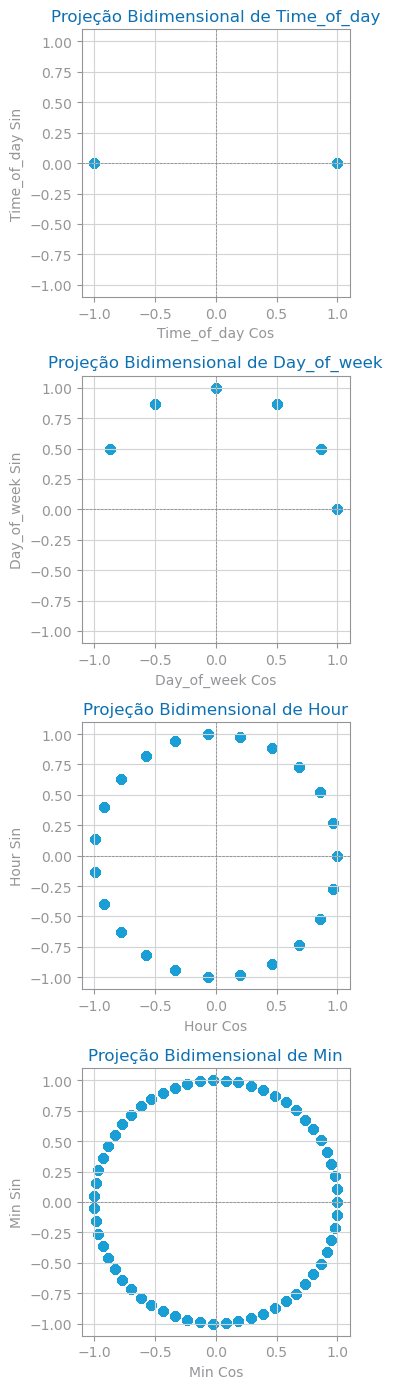

In [219]:
import matplotlib.pyplot as plt

# Lista de variáveis cíclicas
cyclical_vars = ['time_of_day', 'day_of_week', 'hour', 'min']

# Criar gráficos de dispersão para cada variável cíclica com tamanho maior
plt.figure(figsize=(14, 14))  # Aumentando o tamanho da figura

for i, var in enumerate(cyclical_vars):
    # Valores de seno e cosseno para a variável atual
    x_values = df_enc[f'{var}_cos']
    y_values = df_enc[f'{var}_sin']
    
    # Criar um subplot para cada variável
    plt.subplot(len(cyclical_vars), 1, i + 1)
    plt.scatter(x_values, y_values, alpha=0.6)
    plt.axhline(0, color='gray', lw=0.5, ls='--')
    plt.axvline(0, color='gray', lw=0.5, ls='--')
    
    # Ajustar os limites dos eixos para melhor visualização
    plt.xlim(-1.1, 1.1)
    plt.ylim(-1.1, 1.1)
    
    # Adicionar título e rótulos
    plt.title(f'Projeção Bidimensional de {var.capitalize()}')
    plt.xlabel(f'{var.capitalize()} Cos')
    plt.ylabel(f'{var.capitalize()} Sin')
    
    # Mostrar a grade
    plt.grid()
    plt.gca().set_aspect('equal', adjustable='box')  # Para garantir que o gráfico é circular

plt.tight_layout()  # Ajustar o layout
plt.show()  # Mostrar todos os gráficos


## Correlation between variable after enconding

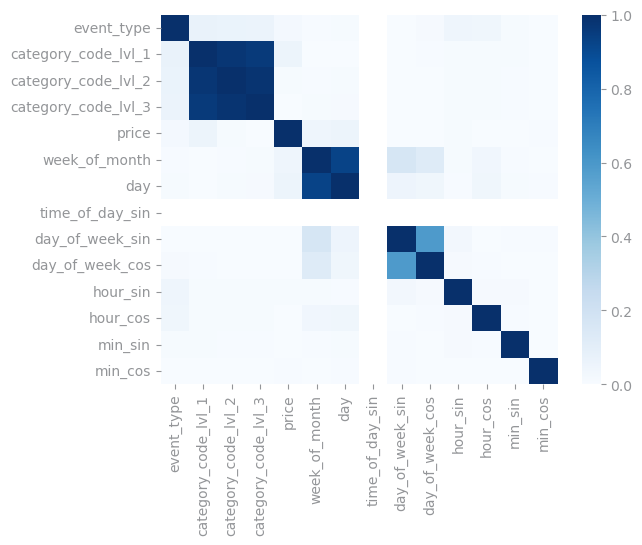

In [224]:
from seaborn import heatmap
from matplotlib.pyplot import figure, savefig, show


variables_types: dict[str, list] = get_variable_types(df_enc)
numeric: list[str] = variables_types["numeric"]
corr_mtx: DataFrame = df_enc[numeric].corr().abs()

figure()
heatmap(
    abs(corr_mtx),
    xticklabels=numeric,
    yticklabels=numeric,
    annot=False,
    cmap="Blues",
    vmin=0,
    vmax=1,
)
#savefig(f"images/{file_tag}_correlation_analysis.png")
show()

## Save final df from Data preparation - ENCODING into a csv file
- We will use this dataset for the missing alues

In [225]:
# Definir o caminho para salvar o arquivo CSV
filepath = r'dataset/df_ecom_data_prep_encoded.csv'

# Salvar o DataFrame em CSV
df_enc.to_csv(filepath, index=False)